In [13]:
%matplotlib inline
import matplotlib
import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from sys import path
import h5py
from sys import path
path.append("/home/hkli/work/mylib/")
import plot_tool
import tool_box

In [14]:
data_path = "/mnt/ddnfs/data_users/hkli/CFHT/gg_lensing/result/mass_map/"

gets_item = [["para", "nx", "0"], ["para", "ny", "0"]]
para_items = tool_box.config(data_path+"result.dat", ["get", "get"], gets_item)

nx, ny = int(para_items[0]), int(para_items[1])

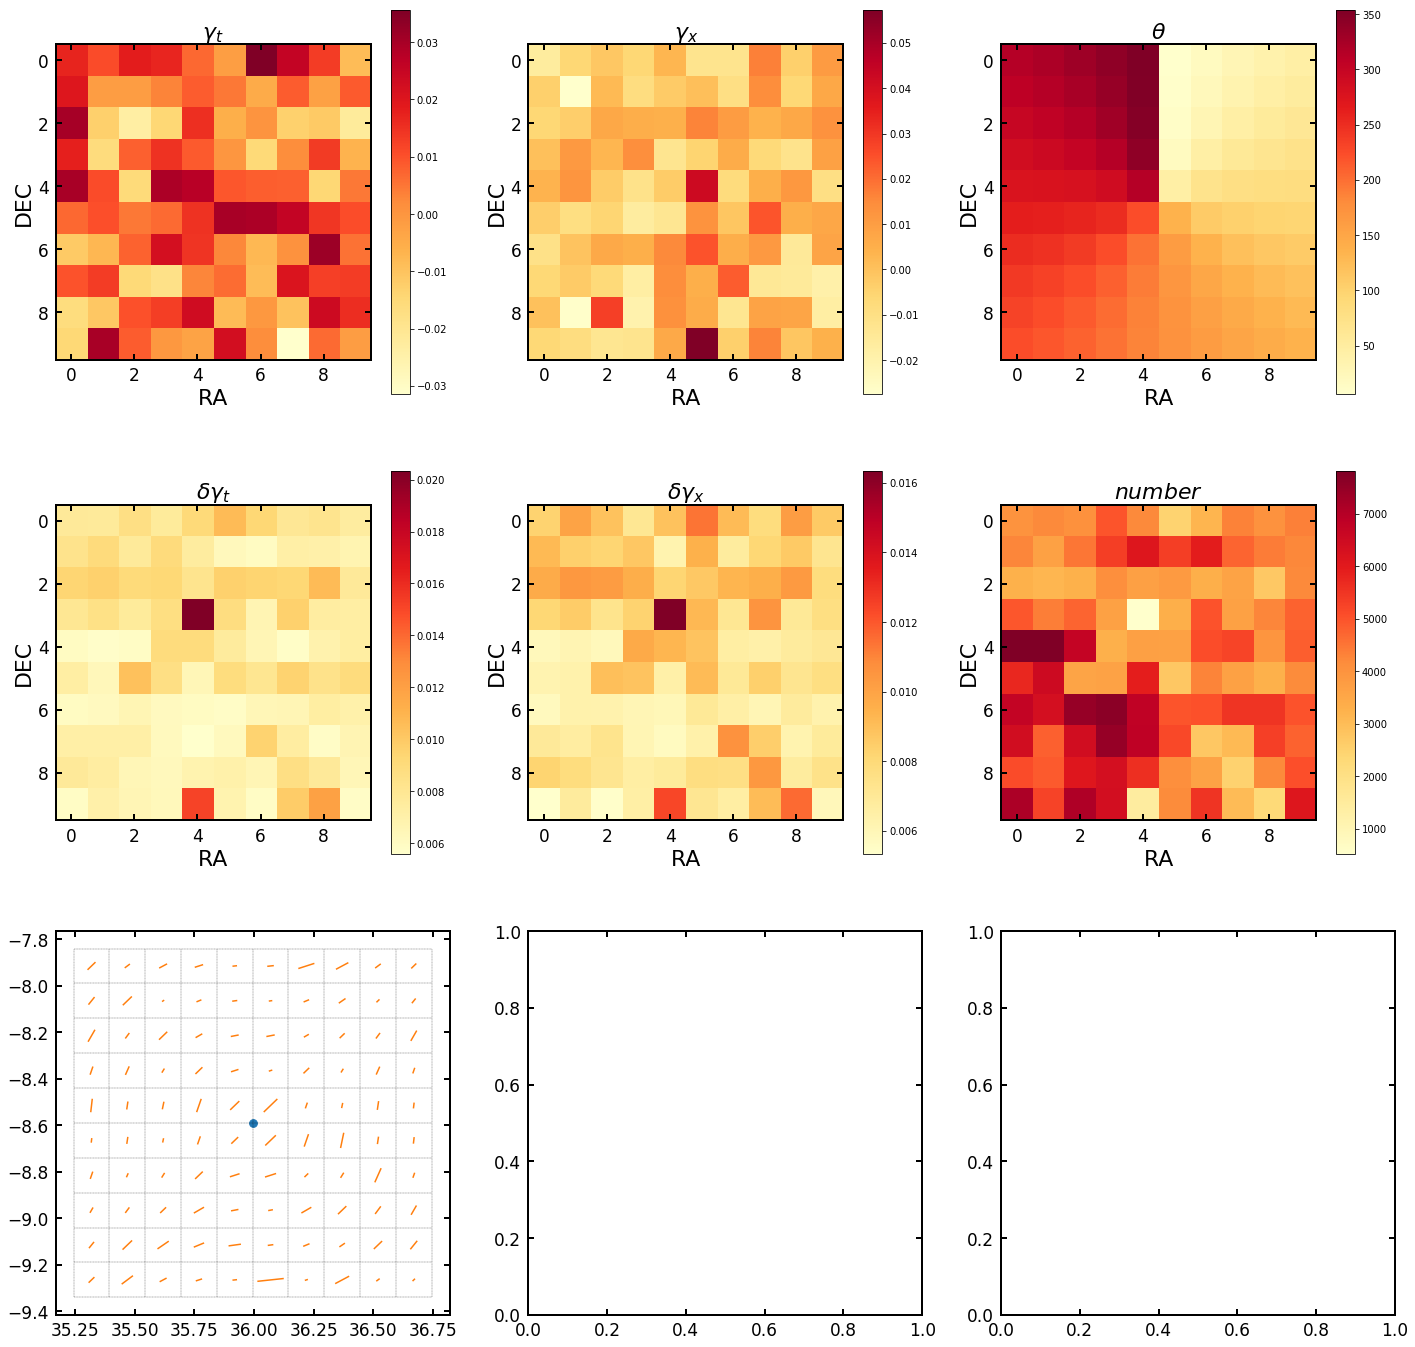

In [41]:
np_data = numpy.load("/mnt/ddnfs/data_users/hkli/CFHT/gg_lensing/result/mass_map/result.npz")

result = np_data["arr_0"]
ra_bin = np_data["arr_1"]
dec_bin = np_data["arr_2"]
foregal = np_data["arr_3"]

inverse = range(ny-1,-1,-1)

gamma_t = result[:ny]
gamma_t_sig = result[ny:2*ny]
gamma_x = result[2*ny:3*ny]
gamma_x_sig = result[3*ny:4*ny]

gamma = numpy.sqrt(gamma_t**2 + gamma_x**2)

num = result[4*ny:5*ny]
angle = result[5*ny:6*ny]

ra_min, ra_max = ra_bin.min(), ra_bin.max()
dec_min, dec_max = dec_bin.min(), dec_bin.max()

datas = [[gamma_t, gamma_x, angle/numpy.pi*180], [gamma_t_sig,gamma_x_sig,num ]]
titles = [["$\gamma_t$", "$\gamma_x$", "$\\theta$"],
         ["$\delta \gamma_t$","$\delta \gamma_x$","$number$"]]
img = plot_tool.Image_Plot(fig_x=8, fig_y=8)
img.create_subfig(3,3)
cmap = plt.get_cmap('YlOrRd')
sm = plt.cm.ScalarMappable(cmap=cmap)

for i in range(2):
    for j in range(3):
        ax = img.axs[i][j].imshow(datas[i][j][inverse],cmap=cmap)
        img.tick_label(i,j, 1, "RA")
        img.tick_label(i,j, 0, "DEC")
        img.axs[i][j].set_title(titles[i][j],fontsize=img.xy_lb_size)
        img.figure.colorbar(ax, ax=img.axs[i][j])

img.axs[2][0].scatter(foregal[0], foregal[1],s=60,marker="o")
for i in range(ny + 1):
    img.axs[2][0].plot([ra_min, ra_max], [dec_bin[i], dec_bin[i]], c="black", linestyle="--" ,linewidth=0.3)
for j in range(nx + 1):
    img.axs[2][0].plot([ra_bin[j], ra_bin[j]], [dec_min, dec_max], c="black",linestyle="--" , linewidth=0.3)

max_g = gamma.max()
max_len = (ra_bin[2] - ra_bin[1])*0.7

dg_scale = gamma/max_g*max_len/2

for i in range(ny):
    for j in range(nx):
        dx = numpy.abs(dg_scale[i,j]*numpy.cos(angle[i,j]))
        dy = numpy.abs(dg_scale[i,j]*numpy.sin(angle[i,j]))
        x = (ra_bin[j] + ra_bin[j+1])/2
        y = (dec_bin[i] + dec_bin[i+1])/2
        img.axs[2][0].plot([x-dx, x+dx], [y-dy, y+dy],c="C1")
        img.tick_label(i,j, 1, "RA")
        img.tick_label(i,j, 0, "DEC")
img.save_img(data_path + "result.png")